In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
data= pd.read_csv("US_Accidents_March23.csv")
pd.set_option("display.max_columns",None) 
data.head(5)
display (data.head(5))

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
data.drop(['End_Lat','End_Lng'],axis=1,inplace=True)
data

In [7]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
data.shape

(7728394, 44)

In [8]:
data.isnull().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [9]:
data["Temperature(F)"].fillna(data["Temperature(F)"].mean(), inplace=True)
data["Pressure(in)"].fillna(data["Pressure(in)"].mean(), inplace= True)

In [10]:
data.isnull().sum().sort_values(ascending=False)

End_Lng                  3402762
End_Lat                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Weather_Timestamp         120228
Astronomical_Twilight      23246
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Roundabout                     0
Crossing                       0
Railway                        0
Station                        0
Stop                           0
No_Exit                        0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Loop                   0
Junction                       0
Give_Way  

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
data.duplicated().sum()

0

In [8]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


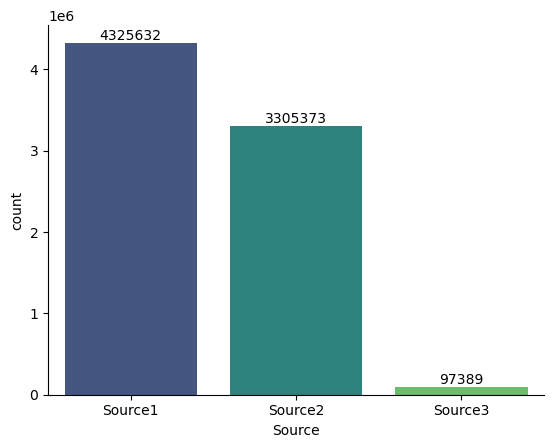

In [16]:
raw_data_source=data.Source.value_counts()                                            
sns.barplot(x=raw_data_source.index,y=raw_data_source,palette='viridis')         
sns.despine(right=True)                                       
for i,v in enumerate(raw_data_source):                           
    plt.text(i,v+1, str(v),ha='center',va='bottom')  

In [25]:
data.City.value_counts()

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [27]:
data.tail(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.0,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7728393,A-7777761,Source1,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,At Highland Ave/Arden Ave - Accident.,CA-210 W,Highland,San Bernardino,CA,92346,US,US/Pacific,KSBD,2019-08-23 20:50:00,79.0,79.0,47.0,28.63,7.0,SW,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


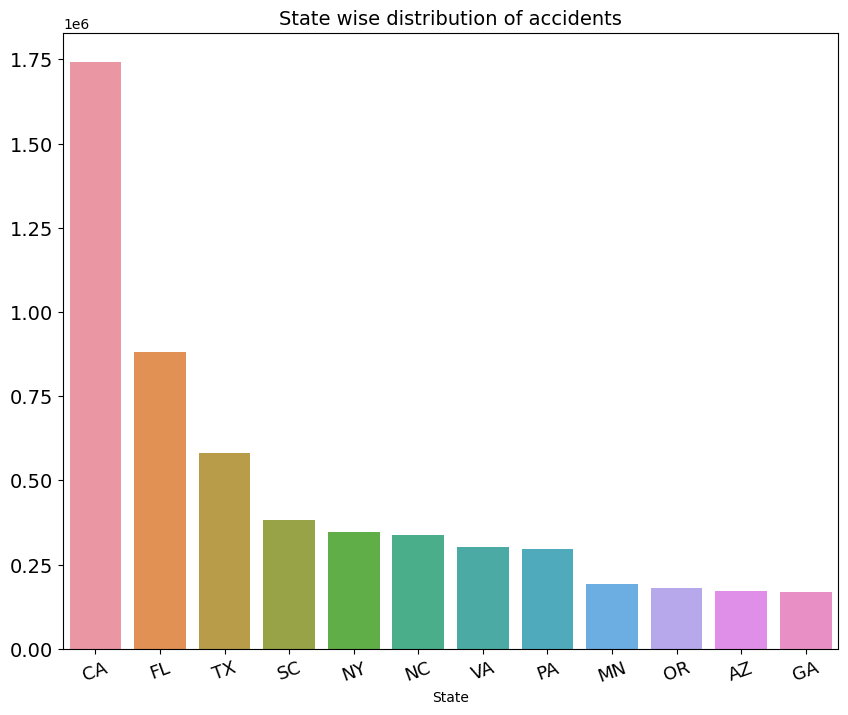

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x=data['State'],order=['CA','FL','TX','SC','NY','NC','VA','PA','MN','OR','AZ','GA'])
plt.xticks(rotation=20,size=13)
plt.yticks(size=14)
plt.ylabel(None)
plt.title('State wise distribution of accidents',fontsize=14)
plt.show()

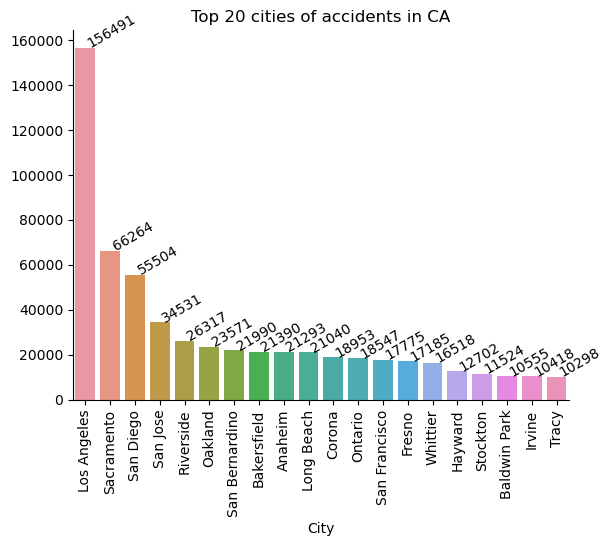

In [35]:
CA_data = data[data['State']=='CA']
CA_city =CA_data.groupby('City')['City'].count().sort_values(ascending=False).head(20)
sns.barplot(x=CA_city.index,y=CA_city)
sns.despine(right=True)
for i,v in enumerate(CA_city):
    plt.text(i,v+1,str(v),rotation=30)
plt.xticks(rotation=90)
plt.ylabel(None)
plt.title('Top 20 cities of accidents in CA')
plt.show()

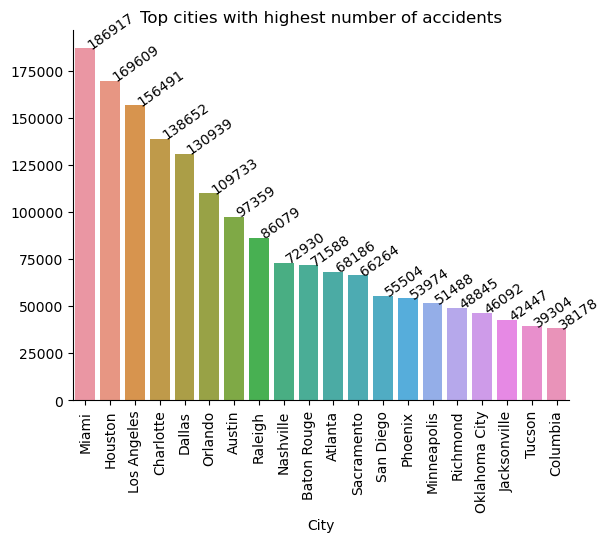

In [12]:
city_data=data.groupby('City')['City'].count().sort_values(ascending=False).head(20)
sns.barplot(x=city_data.index,y=city_data)
sns.despine(right=True)
for i,v in enumerate(city_data):
    plt.text(i,v+1,str(v),rotation=35)
    plt.xticks(rotation=90)
    plt.ylabel(None)
plt.title('Top cities with highest number of accidents')
plt.show()

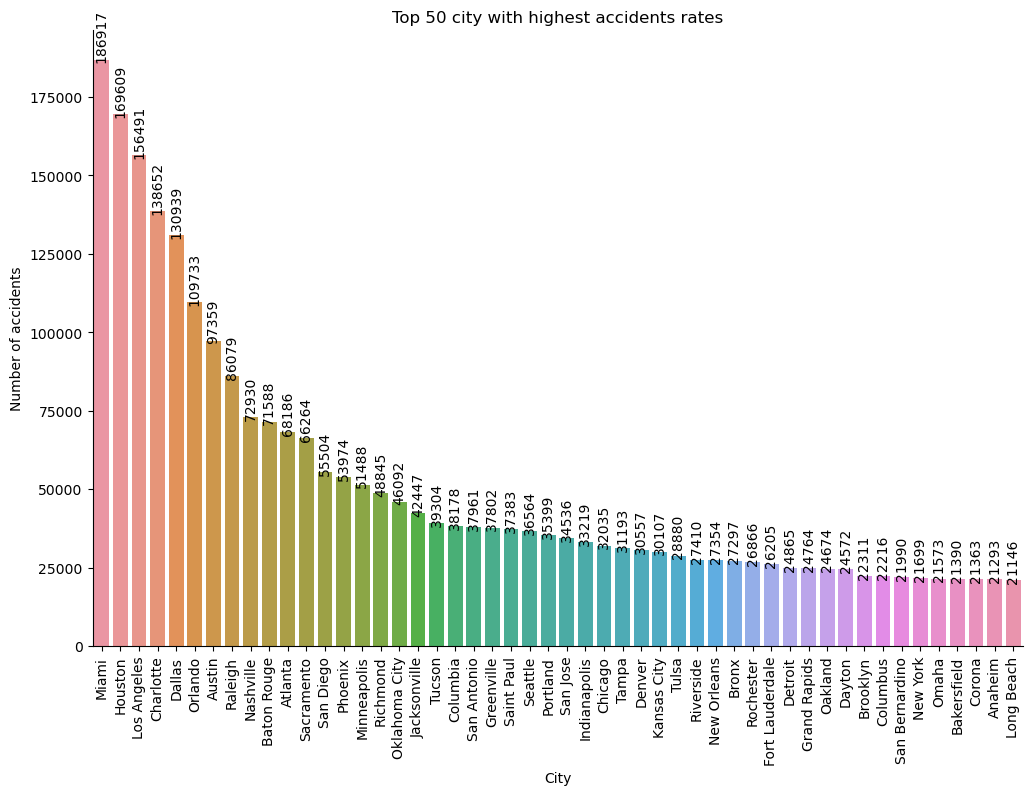

In [17]:
plt.figure(figsize=(12,8))
city_data_group = data.groupby('City')['City'].count().sort_values(ascending=False).head(50)
sns.barplot(x=city_data_group.index,y=city_data_group)
sns.despine(right=True)
for i,v in enumerate(city_data_group):
    plt.text(i,v+1,str(v),ha='center',rotation=90)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Number of accidents')
plt.title('Top 50 city with highest accidents rates')
plt.show()

In [28]:
# changing data 'types of the columns End-time to extract day,month ,year and other details
data['End_Time']=data['End_Time'].astype(str).str.replace(r'\.\d+','',regex=True)
data['End_Time']=pd.to_datetime(data['End_Time'],format='%Y-%m-%d %H:%M:%S')
data['Year']=data['End_Time'].dt.year
data['Month']=data['End_Time'].dt.month
data['Day']=data["End_Time"].dt.day
data['Hour']=data['End_Time'].dt.hour
data['Minute']=data["End_Time"].dt.minute
data['Second']=data['End_Time'].dt.second
data['Date']=data['End_Time'].dt.date
data['Time']=data['End_Time'].dt.time

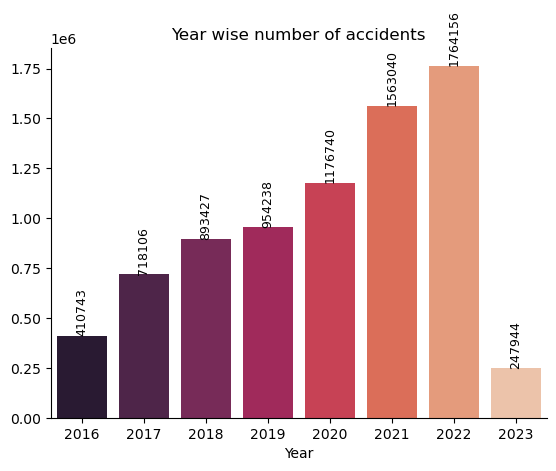

In [32]:
year_data = data.groupby('Year')['ID'].count()  #it was only possible when you to the formattin of date year. which was just end_time.
sns.barplot(x=year_data.index,y=year_data,palette='rocket')
sns.despine(right=True)
for i,v in enumerate(year_data):
    plt.text(i,v+1,str(v),rotation=90,ha='center',va='bottom',size=9)
plt.ylabel(None)
plt.title('Year wise number of accidents')
plt.show()

In [35]:
data.Timezone.value_counts()

Timezone
US/Eastern     3580167
US/Pacific     2062984
US/Central     1645616
US/Mountain     431819
Name: count, dtype: int64

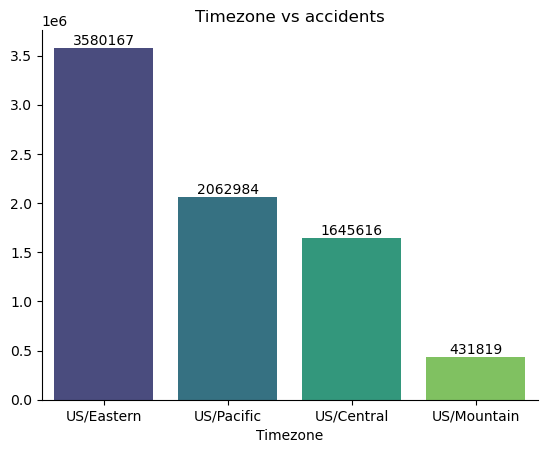

In [36]:
timezone_data = data.groupby('Timezone')['Timezone'].count().sort_values(ascending=False)
sns.barplot(x=timezone_data.index,y=timezone_data,palette='viridis')
sns.despine(right=True)
for i,v in enumerate(timezone_data):
    plt.text(i,v+1,str(v),ha='center',va='bottom')
plt.ylabel(None)
plt.xlabel('Timezone')
plt.title('Timezone vs accidents')
plt.show()

In [38]:
data.Crossing.value_counts()

Crossing
False    6854631
True      873763
Name: count, dtype: int64

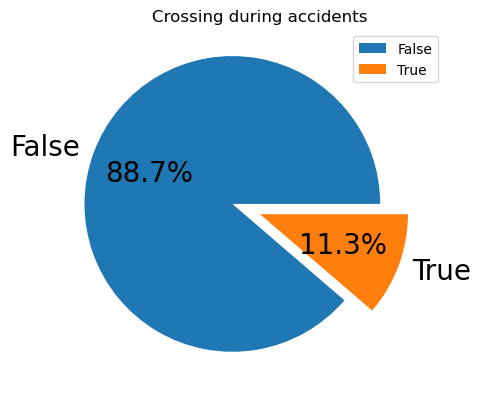

In [39]:
crossing_data= data.groupby('Crossing')['Crossing'].count()
plt.pie(crossing_data,explode=[0.2,0],labels=crossing_data.index,autopct='%1.1f%%',textprops={'color':'Black','size':'20'})
plt.title('Crossing during accidents')
plt.legend()
plt.show()

In [40]:
data.Sunrise_Sunset.value_counts()

Sunrise_Sunset
Day      5334553
Night    2370595
Name: count, dtype: int64

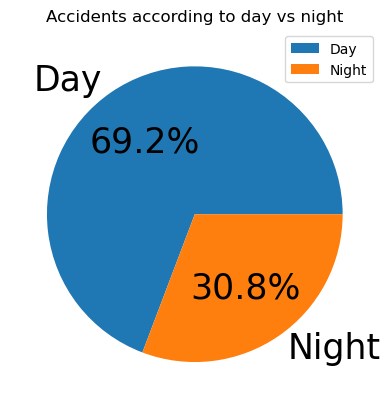

In [42]:
day_night = data.Sunrise_Sunset.value_counts()
plt.pie(day_night,labels=day_night.index,autopct='%1.1f%%',textprops={'color':'Black','size':25})
plt.title('Accidents according to day vs night')
plt.legend()
plt.show()

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64


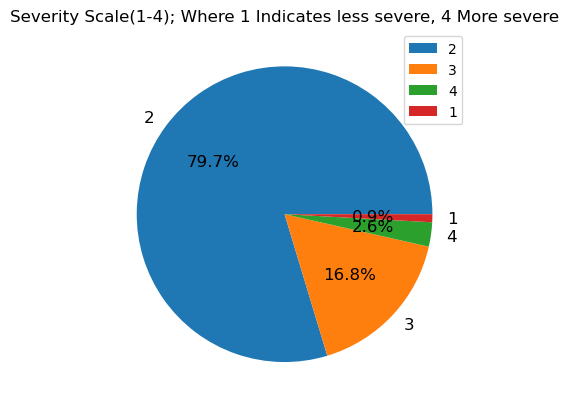

In [5]:
severity_per = data.Severity.value_counts()
print(severity_per)
plt.pie(severity_per,labels=severity_per.index,autopct='%1.1f%%',textprops={'size':'12'})
plt.title('Severity Scale(1-4); Where 1 Indicates less severe, 4 More severe')
plt.legend()
plt.show()

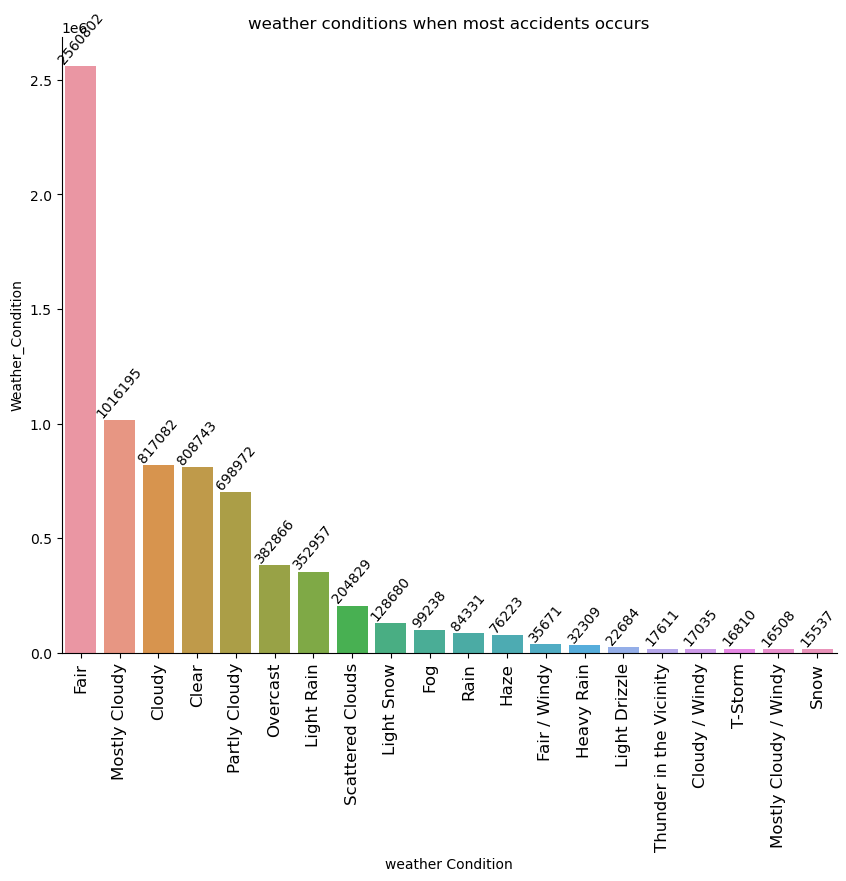

In [44]:
plt.figure(figsize=(10,8))
weather_cond= data.groupby('Weather_Condition')['Weather_Condition'].count().sort_values(ascending=False).head(20)
sns.barplot(x=weather_cond.index,y=weather_cond)
sns.despine(right=True)
for i,v in enumerate(weather_cond):
    plt.text(i,v+1,str(v),ha='center',va='bottom',rotation=50)
plt.xticks(rotation=90,size=12)
plt.xlabel("weather Condition")
plt.title('weather conditions when most accidents occurs')
plt.show()

**BIVARIATE ANALYSIS**

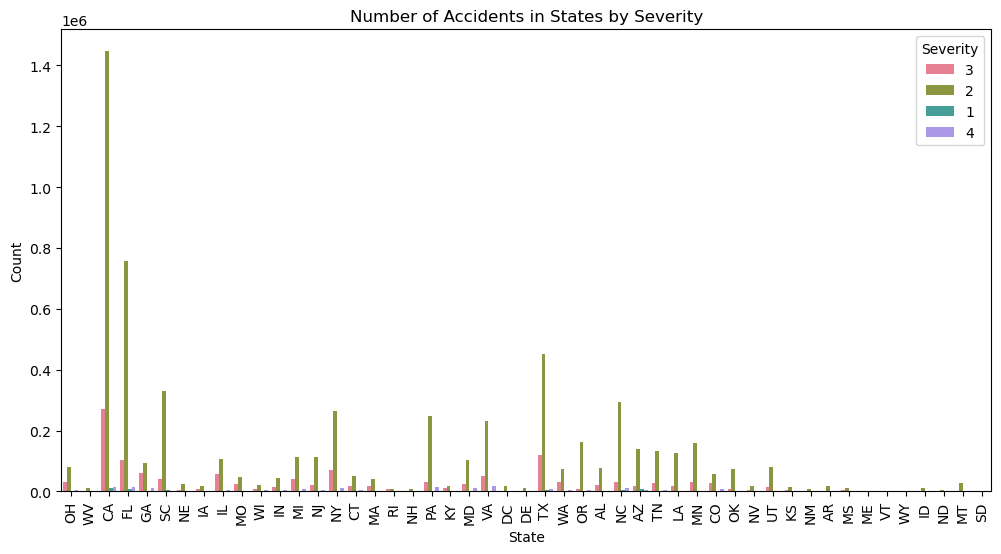

In [11]:

# Drop NaN values to avoid issues
plot_data = data.dropna(subset=['State', 'Severity'])

# Convert Severity to a string if it's numeric
plot_data['Severity'] = plot_data['Severity'].astype(str)

plt.figure(figsize=(12, 6))

# Count plot for accidents by state with severity levels
sns.countplot(data=plot_data, x='State', hue='Severity', palette='husl')

plt.xticks(rotation=90)

plt.xlabel('State')
plt.ylabel('Count')  # Changed from None to a meaningful label
plt.title('Number of Accidents in States by Severity')

plt.show()


J:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
J:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


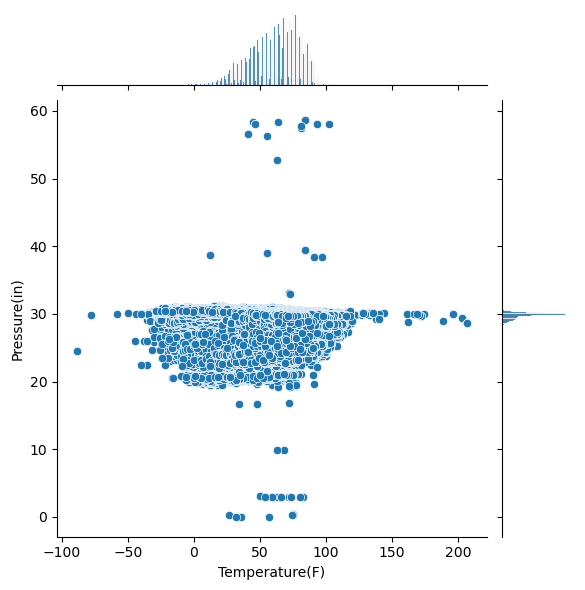

In [49]:
#Temparature and pressure
columns= data[['Temperature(F)','Pressure(in)']] 
plot_data =columns[columns.notnull().all(axis=1)]
sns.jointplot(data=plot_data,x='Temperature(F)',y='Pressure(in)')
plt.show()

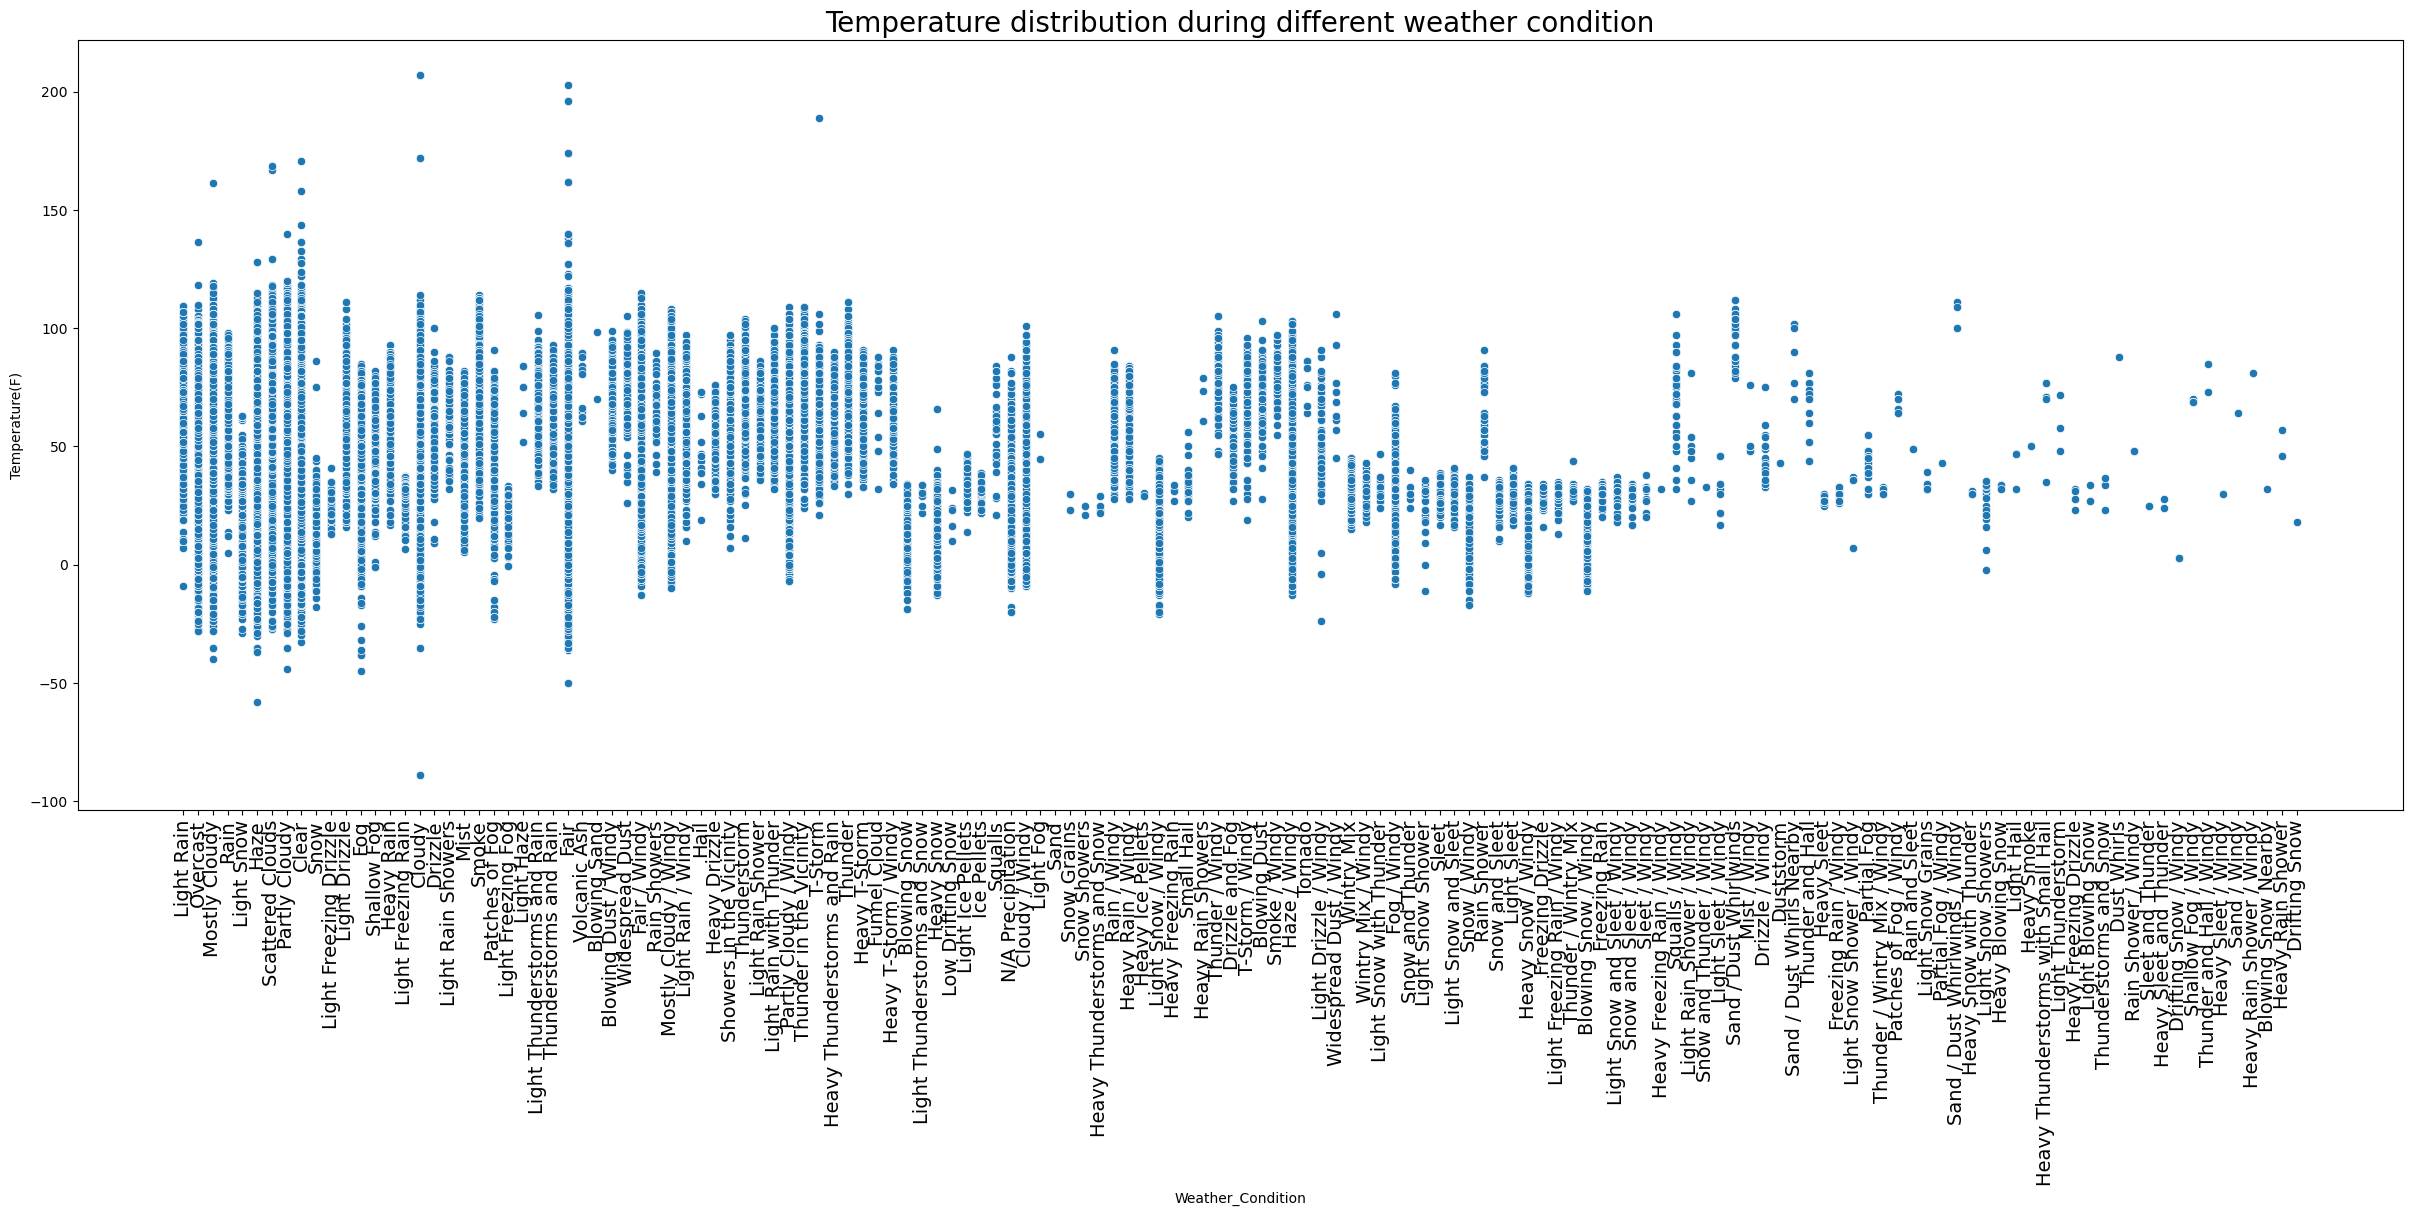

In [50]:
sns.scatterplot(data=data,x='Weather_Condition',y='Temperature(F)')
fig= plt.gcf()
fig.set_size_inches(30,10)
plt.xticks(rotation=90,size=14)
plt.title("Temperature distribution during different weather condition",size=20)
plt.show()

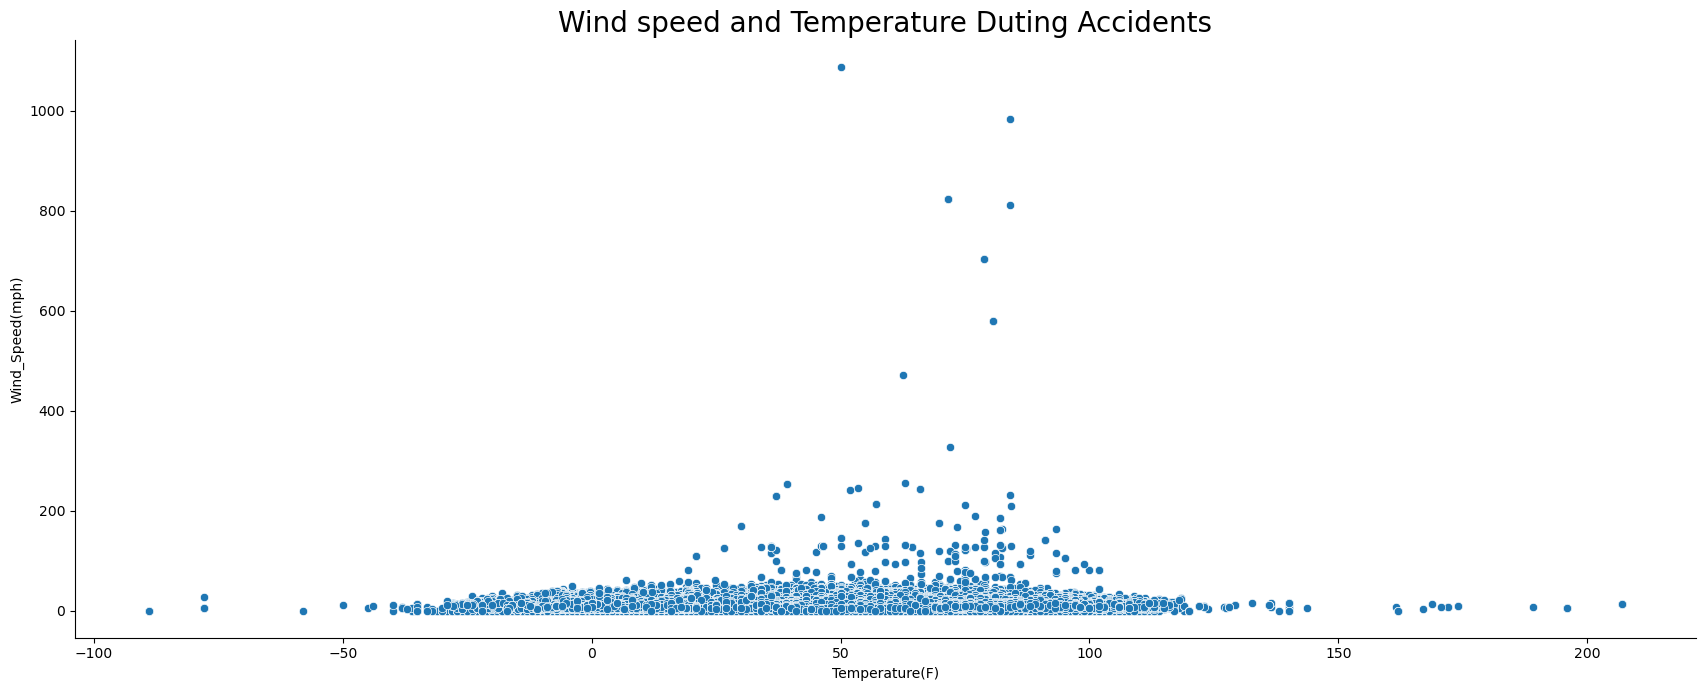

In [6]:
#wind speed and temperature
sns.relplot(data=data,x='Temperature(F)',y='Wind_Speed(mph)')
plt.title('Wind speed and Temperature Duting Accidents',size=20)
fig=plt.gcf()
fig.set_size_inches(20,7)
plt.show()

**MULTIVARIATE ANALYSIS**

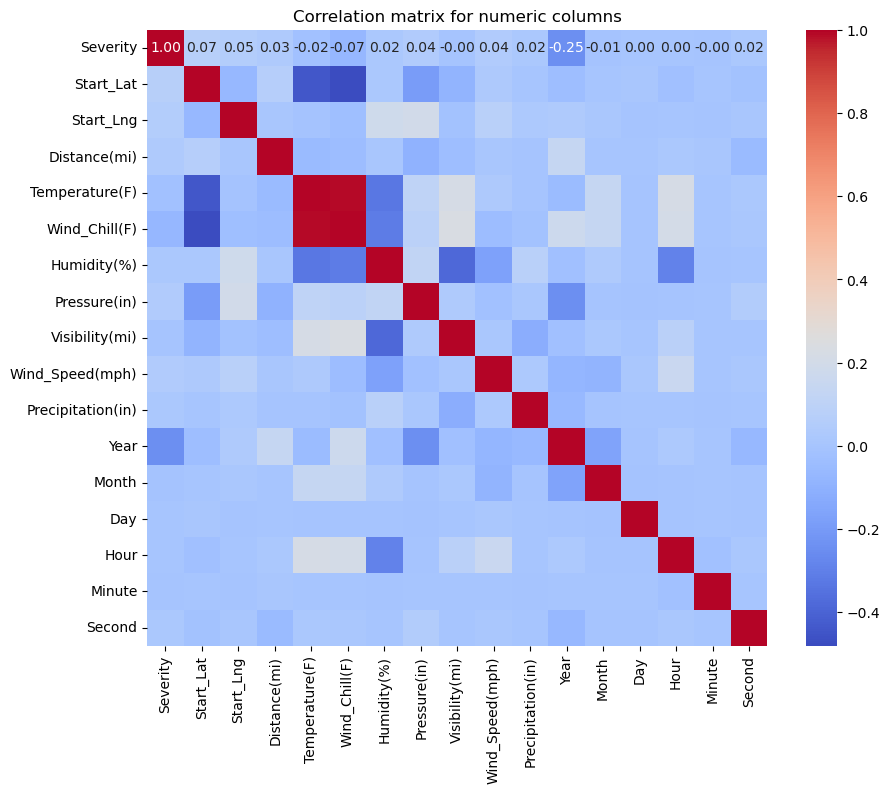

In [52]:
num_cols= data.select_dtypes(include='number').columns.tolist()
num_data = data[['Severity',
'Start_Lat',
'Start_Lng',
'Distance(mi)',
'Temperature(F)',
'Wind_Chill(F)',
'Humidity(%)',
'Pressure(in)',
'Visibility(mi)',
'Wind_Speed(mph)', 
'Precipitation(in)',
'Year',
'Month',
'Day',
'Hour',
'Minute',
'Second']]
plt.figure(figsize=(10,8))
correlation_matrix= num_data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='0.2f')
plt.title('Correlation matrix for numeric columns')
plt.show()